<a href="https://colab.research.google.com/github/TemsyChen/DS-Unit-2-Applied-Modeling/blob/master/TemsyChen_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

#Wildfire Trends

This dataset is from a [Buzzfeed article](https://buzzfeednews.github.io/2018-07-wildfire-trends/) that contains data from Cal Fire and the US Forest service.

#Import the datasets

In [79]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from datetime import datetime 

In [84]:
!pip install category_encoders==2.*

     |████████████████████████████████| 81kB 3.2MB/s 


In [13]:
#pandas profiling of the data
!pip install pandas-profiling==2.*

In [2]:
# #Import the US Forest service data set

# fires1 = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-07-wildfire-trends/master/data/us_fires/us_fires_1.csv')
# fires2 = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-07-wildfire-trends/master/data/us_fires/us_fires_2.csv')
# fires3 = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-07-wildfire-trends/master/data/us_fires/us_fires_3.csv')
# fires4 = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-07-wildfire-trends/master/data/us_fires/us_fires_4.csv')
# fires5 = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-07-wildfire-trends/master/data/us_fires/us_fires_5.csv')
# fires6 = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-07-wildfire-trends/master/data/us_fires/us_fires_6.csv')
# fires7 = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-07-wildfire-trends/master/data/us_fires/us_fires_7.csv')

# all_fires = [fires1, fires2, fires3, fires4, fires5, fires6, fires7]

# fires = pd.concat(all_fires) 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,12,14,15,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,12,16,17,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,14,15,18,25,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivi

In [3]:
# #Check that the final dataframe is the correct size

# print("First imported dataframe shape:", fires1.shape)
# print("Second imported dataframe shape:", fires2.shape)
# print("Second imported dataframe shape:", fires7.shape)
# print("Concatenated dataframe shape:", fires.shape)

First imported dataframe shape: (300000, 38)
Second imported dataframe shape: (300000, 38)
Second imported dataframe shape: (80465, 38)
Concatenated dataframe shape: (1880465, 38)


In [4]:
#Import the Cal Fire dataset

frap = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-07-wildfire-trends/master/data/calfire_frap.csv')

#EDA

In [5]:
frap.head()

,objectid,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,comments,report_ac,gis_acres,c_method,objective,fire_num,shape_length,shape_area
0,1,2007,CA,CCO,LAC,OCTOBER,246393,2007-10-21,2007-10-23,14.0,NaN,NaN,25.736713,8.0,1.0,233414,1902.439051,1.041528e+05
1,2,2007,CA,CCO,LAC,MAGIC,233077,2007-10-22,2007-10-25,14.0,NaN,NaN,2824.877197,8.0,1.0,233077,20407.965662,1.143187e+07
2,3,2007,CA,USF,ANF,RANCH,166,2007-10-20,2007-11-15,2.0,NaN,54716.0,58410.335938,7.0,1.0,166,169150.715690,2.363782e+08
3,4,2007,CA,CCO,LAC,EMMA,201384,2007-09-11,2007-09-11,14.0,NaN,NaN,172.214951,8.0,1.0,201384,6117.777086,6.969292e+05
4,5,2007,CA,CCO,LAC,CORRAL,259483,2007-11-24,2007-11-27,14.0,NaN,NaN,4707.997070,8.0,1.0,259483,22907.182174,1.905259e+07


In [6]:
frap.shape

(14847, 18)

In [7]:
frap.columns

Index(['objectid', 'year_', 'state', 'agency', 'unit_id', 'fire_name',
       'inc_num', 'alarm_date', 'cont_date', 'cause', 'comments', 'report_ac',
       'gis_acres', 'c_method', 'objective', 'fire_num', 'shape_length',
       'shape_area'],
      dtype='object')

In [8]:
fires.head()

,objectid,fod_id,fpa_id,source_system_type,source_system,nwcg_reporting_agency,nwcg_reporting_unit_id,nwcg_reporting_unit_name,source_reporting_unit,source_reporting_unit_name,local_fire_report_id,local_incident_id,fire_code,fire_name,ics_209_incident_number,ics_209_name,mtbs_id,mtbs_fire_name,complex_name,fire_year,discovery_date,discovery_doy,discovery_time,stat_cause_code,stat_cause_descr,cont_date,cont_doy,cont_time,fire_size,fire_size_class,latitude,longitude,owner_code,owner_descr,state,county,fips_code,fips_name
0,1,1.0,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2005-02-02T00:00:00,33,1300.0,9,Miscellaneous,2005-02-02T00:00:00,33.0,1730.0,0.10,A,40.036944,-121.005833,5,USFS,CA,63,63.0,Plumas
1,2,2.0,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2004-05-12T00:00:00,133,845.0,1,Lightning,2004-05-12T00:00:00,133.0,1530.0,0.25,A,38.933056,-120.404444,5,USFS,CA,61,61.0,Placer
2,3,3.0,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2004-05-31T00:00:00,152,1921.0,5,Debris Burning,2004-05-31T00:00:00,152.0,2024.0,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,17.0,El Dorado
3,4,4.0,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2004-06-28T00:00:00,180,1600.0,1,Lightning,2004-07-03T00:00:00,185.0,1400.0,0.10,A,38.559167,-119.913333,5,USFS,CA,3,3.0,Alpine
4,5,5.0,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2004-06-28T00:00:00,180,1600.0,1,Lightning,2004-07-03T00:00:00,185.0,1200.0,0.10,A,38.559167,-119.933056,5,USFS,CA,3,3.0,Alpine


In [9]:
fires.columns

Index(['objectid', 'fod_id', 'fpa_id', 'source_system_type', 'source_system',
       'nwcg_reporting_agency', 'nwcg_reporting_unit_id',
       'nwcg_reporting_unit_name', 'source_reporting_unit',
       'source_reporting_unit_name', 'local_fire_report_id',
       'local_incident_id', 'fire_code', 'fire_name',
       'ics_209_incident_number', 'ics_209_name', 'mtbs_id', 'mtbs_fire_name',
       'complex_name', 'fire_year', 'discovery_date', 'discovery_doy',
       'discovery_time', 'stat_cause_code', 'stat_cause_descr', 'cont_date',
       'cont_doy', 'cont_time', 'fire_size', 'fire_size_class', 'latitude',
       'longitude', 'owner_code', 'owner_descr', 'state', 'county',
       'fips_code', 'fips_name'],
      dtype='object')

In [10]:
#Merge the two dataframes on 'fire_name'

#Too big, keeps crashing colab
#df = frap.merge(fires1, on='fire_name')

I'll proceed with the frap dataset, using "gis_acres" as the target, to predict the size of wildfires in California.

This is a regression model.

In [11]:
#Explore the target column

frap['gis_acres'].describe()

#Right skewed 

count     14841.000000
mean       1730.762064
std        9878.159960
min           0.001357
25%          25.658598
50%         142.552170
75%         624.751709
max      501082.031250
Name: gis_acres, dtype: float64

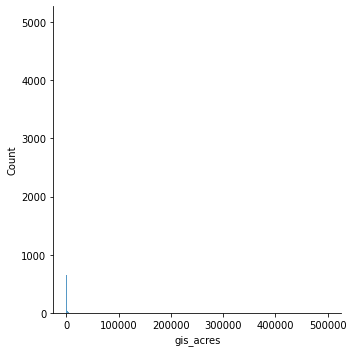

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(frap['gis_acres']);

In [14]:
from pandas_profiling import ProfileReport

#import pandas_profiling
profile = ProfileReport(frap, minimal=True)

profile

In [15]:
frap['fire_name'].nunique()

7411

In [16]:
frap.describe()

,objectid,year_,cause,report_ac,gis_acres,c_method,objective,shape_length,shape_area
count,14847.000000,14847.000000,14805.000000,7088.000000,14841.000000,7494.000000,14672.000000,14847.000000,1.484700e+04
mean,11631.642150,1988.606318,8.796082,2146.328182,1730.762064,4.692554,1.017993,8858.614211,7.001315e+06
std,5375.934738,20.122024,5.326349,13293.335145,9878.159960,3.100902,0.132932,19622.262001,3.996766e+07
min,1.000000,1950.000000,1.000000,0.000000,0.001357,1.000000,1.000000,8.838431,5.491126e+00
25%,8025.500000,1973.000000,2.000000,17.450000,25.658598,1.000000,1.000000,1594.310671,1.033449e+05
50%,11879.000000,1991.000000,9.000000,67.960000,142.552170,6.000000,1.000000,3846.212541,5.764822e+05
75%,16220.500000,2007.000000,14.000000,400.000000,624.751709,8.000000,1.000000,8454.143860,2.526163e+06
max,20715.000000,2017.000000,19.000000,499945.000000,501082.031250,8.000000,2.000000,445282.444798,2.027807e+09


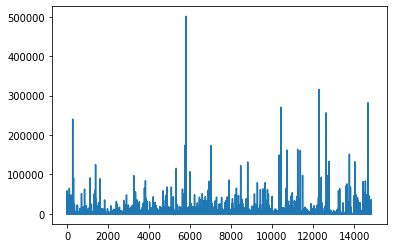

In [17]:
frap['gis_acres'].plot()

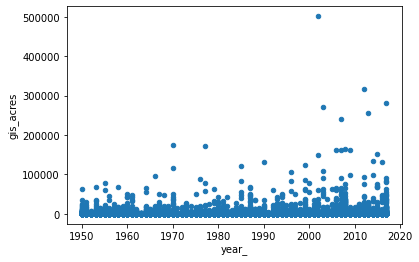

In [21]:
frap.plot.scatter(x='year_', y='gis_acres')

Subset of CA fires from US Fires data

In [23]:
# fires1_CA = fires1[fires1['state']=='CA']

In [25]:
# fires1_CA.shape

(45254, 38)

In [26]:
# fires_CA = fires[fires['state']=='CA']

In [28]:
# fires.shape

(1880465, 38)

In [ ]:
#still too big, keeps crashing

#merge fires1_CA and frap

# df1 = frap.merge(fires1_CA, on='fire_name', how='inner')

Make a Model

In [23]:
#Drop high cardinality categoricals

high_card = ['objectid','unit_id','fire_name','inc_num','comments','fire_num','state','agency']

df = frap.drop(columns=high_card)

In [24]:
#feature engineer a new column "duration"

df['alarm_date'] = pd.to_datetime(df['alarm_date'])
df['cont_date'] = pd.to_datetime(df['cont_date'])

df['duration'] = (df['cont_date']-df['alarm_date']).astype('timedelta64[D]')

df['duration'].head()

0     2.0
1     3.0
2    26.0
3     0.0
4     3.0
Name: duration, dtype: float64

In [14]:
df.head()

,year_,alarm_date,cont_date,cause,report_ac,gis_acres,c_method,objective,shape_length,shape_area,duration
0,2007,2007-10-21,2007-10-23,14.0,NaN,25.736713,8.0,1.0,1902.439051,1.041528e+05,2.0
1,2007,2007-10-22,2007-10-25,14.0,NaN,2824.877197,8.0,1.0,20407.965662,1.143187e+07,3.0
2,2007,2007-10-20,2007-11-15,2.0,54716.0,58410.335938,7.0,1.0,169150.715690,2.363782e+08,26.0
3,2007,2007-09-11,2007-09-11,14.0,NaN,172.214951,8.0,1.0,6117.777086,6.969292e+05,0.0
4,2007,2007-11-24,2007-11-27,14.0,NaN,4707.997070,8.0,1.0,22907.182174,1.905259e+07,3.0


In [49]:
#Negative numbers may be attributed to when containment is null

df['duration'].value_counts()

-135.0       1
 150.0       1
 142.0       1
-292.0       1
-27.0        1
          ... 
 4.0       286
 3.0       396
 2.0       572
 1.0      1258
 0.0      2966
Name: duration, Length: 187, dtype: int64

In [57]:
df['alarm_date'].isnull().sum()

1617

Do a time-based split on the data

There are 14,847 rows, so 70% train, 20% validation, 10% test



In [59]:
#Tried to find the dates for train/val/test split with alarm_date
#Too many null values, doesn't work

print("first date for val set:", df['alarm_date'].sort_values(ascending=True).iloc[10393])
print('first date for test set:', df['alarm_date'].sort_values(ascending=True).iloc[13362])


first date for val set: 2009-07-02 00:00:00
first date for test set: NaT


In [62]:
#Train/val/test split with "year_"

print("first date marker between train and val set:", df['year_'].sort_values(ascending=True).iloc[10393])
print('first date marker between val and test set:', df['year_'].sort_values(ascending=True).iloc[13362])

first date for val set: 2004
first date for test set: 2014


In [68]:
train = df[df['year_']<=2004]
val = df[(df['year_']>2004)&(df['year_']<=2014)]
test = df[df['year_']>2014]

In [69]:
train.shape, val.shape, test.shape

((10493, 11), (3075, 11), (1279, 11))

In [82]:
#Wrangle the data

#Drop features with leakage on the second try
#I think shape_length and shape_area are features with leakage

def wrangle(X):
  X = X.copy()

  #Impute null values quickly
  X = X.fillna('Missing')

  #Convert datetime features to int64
  #X[['alarm_date','cont_date']] = X[['alarm_date','cont_date']].astype(np.int64)
  #X['alarm_date'] = datetime.fromtimestamp(X['alarm_date']).strftime('%d-%m-%y')

  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

Make a Linear Regression Model

In [72]:
#Establish X matrices and y vectors

target = 'gis_acres'
features = df.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((10493, 10), (10493,), (3075, 10), (3075,), (1279, 10), (1279,))

In [71]:
#Get a baseline

print('Training set baseline:', train['gis_acres'].mean())
print('Validation set baseline:', val['gis_acres'].mean())

Training set baseline: 1598.696910376303
Validation set baseline: 2000.3753993789992


In [85]:
#Make the model

from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    LinearRegression()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print('Train Accuracy:', mae, 'acres')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Train Accuracy: 4.091029189439576e-05 acres


In [86]:
#Identify the coefficient and intercept

#work on this more later

print('the intercept is', pipeline.intercept_)
print('the coefficients are:', pipeline.coef_)

AttributeError: ignored

So this is probably overfitted, if the mean absolute error is that small.
Next step is to test it on the validation data.

In [87]:
#Get the MAE for the validation data

y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print('Validation error:', mae, 'acres')

Validation error: 5.1803304153202e-05 acres


I've gone too far in the assignment, doing things that haven't been asked of me yet. I'll stop here.

Dictionary of terms:

YEAR

STATE

AGENCY

UNIT_ID

FIRE_NAME

INC_NUM (incident number)

ALARM_DATE

CONT_DATE (containment date)

CAUSE

COMMENTS

REPORT_AC (reported number of acres burned)

GIS_ACRES (number of acres burned as determined by analysis of GIS data)

C_METHOD

OBJECTIVE